# Jinja2 and YAML for Jupyter

People use YAML and Jinja2 together; they're the core of Ansible. Sometimes 
you need a playground to figure out details of how they work. This magic provides
both.

In [1]:
%load_ext jinja_yaml_magic
%reload_ext jinja_yaml_magic

(Ignore the warning for `%load_ext`/`%reload_ext`.)

## YAML

`%%yaml variable` parses the YAML in a cell into the named *variable*. 
If you omit `variable`, the YAML is parsed into the variable `jinja_env`; it's also
then available through the history mechanism: `Out[3]` or `_3`.

In [2]:
%%yaml
names:
- Jay
- Chris
- Pat

{'names': ['Jay', 'Chris', 'Pat']}

In [3]:
%%jinja
{{ names }}

['Jay', 'Chris', 'Pat']

## Jinja2

If you just want to try out a quick template, write `%%jinja` at the top of a cell. Both the contents of `jinja_env` and notebook variables are available. Below, we're using `names` from the `%%yaml` above, and `separator` from the notebook.

In [4]:
separator = ", "

In [5]:
%%jinja
{{ names|sort|join(separator) }}

Chris, Jay, Pat

### Named templates

You may want to store Jinja2 code as a template.

* You can reuse the template later in the notebook;
* You can use Jinja2's powerful `extends`, `import`, and `include` mechanisms.

The template below is available under the name `fancy_names`. *Files in the current directory are also available as templates.*

In [6]:
%%jinja_template fancy_names
{% for name in names %}
<b>{{ name }}</b><br>
{%- endfor %}

In [7]:
%jinja --template fancy_names


<b>Jay</b><br>
<b>Chris</b><br>
<b>Pat</b><br>

### Formatting

By default, the result of running a `%jinja` template is formatted as "pretty" text.
You can choose other formats.

|Type|...displays as|
|----|----|
|`--pretty`|A string, without quotes|
|`--plain`|Python string literal|
|`--html`|HTML|
|`--svg`|SVG|
|`--latex`|LaTeX|
|`--markdown`|Markdown|
|`--code`|Syntax-highlighted code|

`--latex` requires MathJax to be loaded; it is by default. `--code` requires
a recent version of IPython.

In [8]:
%jinja --template fancy_names --html

### An SVG example

From [https://medium.com/@heyoka/scratch-made-svg-donut-pie-charts-in-html5-2c587e935d72](https://medium.com/@heyoka/scratch-made-svg-donut-pie-charts-in-html5-2c587e935d72). This template does math, so you may not want to follow its example. 



In [9]:
# Percent of circle to be filled
full = 60
# Percent distance from top to start
offset = 12.5

In [10]:
%%jinja_template svg_example
<svg width="25%" height="25%" viewBox="0 0 42 42" class="donut">
  <circle class="donut-hole" cx="21" cy="21" r="15.91549430918954" fill="#fff"></circle>
  <circle class="donut-ring" cx="21" cy="21" r="15.91549430918954" fill="transparent" stroke="#d2d3d4" stroke-width="3"></circle>
  <circle class="donut-segment" cx="21" cy="21" r="15.91549430918954" fill="transparent" stroke="#ce4b99" stroke-width="3" 
    stroke-dasharray="{{ full }} {{ 100-full }}" stroke-dashoffset="{{ 25 - offset }}"></circle>
</svg>

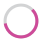

In [11]:
%jinja --template svg_example --svg